# COMM 4940 Great Backyard Bird Count Study Results
[J. Nathan Matias](https://natematias.com), Becca Randomsky-Bish, Tina Phillips, Max Klein, and the students of COM 4940


### Study Design
We randomly assigned participants who were first-time contributors to the Great Backyard Bird Count to receive one of three follow-up messages once results were available. We then observed whether they opened the email, whether they contributed further to the bird count, and how many contributions they made to eBird. We had planned also to measure whether they signed up for Project FeederWatch but were not able to develop that information.

* [Pre-Analysis Plan](https://osf.io/6rvej/)

Data collection for the study ended on May 8th, just before the [Global Big Day](https://ebird.org/news/global-big-day-9-may-2020).

Outcome variables:
* `opened.email`: whether someone opened the email or not, as reported by MailChimp
* `ebird.contribs': the number of lists submitted by the participant to eBird between April 5th and May 8th 2020
* `ebird.contribs>0`: whether someone contributed any photos to ebird after receiving the email. 


### Email Conditions
Due to the small number of participants, we bundled an email subject with a call to action inside the email. In this study, the email subject is influencing whether people open the email. Conditional on opening, we hope that the call to action might influence further behavior, but we can't differentiate between them.

Emails were sent to participants on April 5th, 2020.


#### Control condition (what people normally receive)
In this condition, we included the title "GBBC e-News" which was the typical email subject.

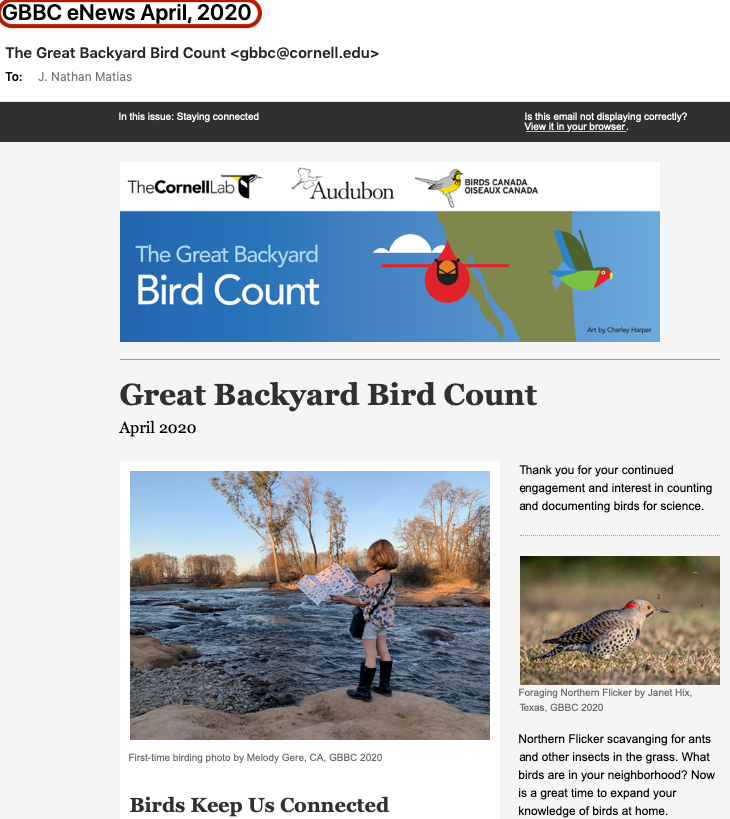

#### Contribute to science condition
In this condition, we used the email subject "GBBC results are in... But we stil need your help!"

We also included a call to action to contribute further to eBird

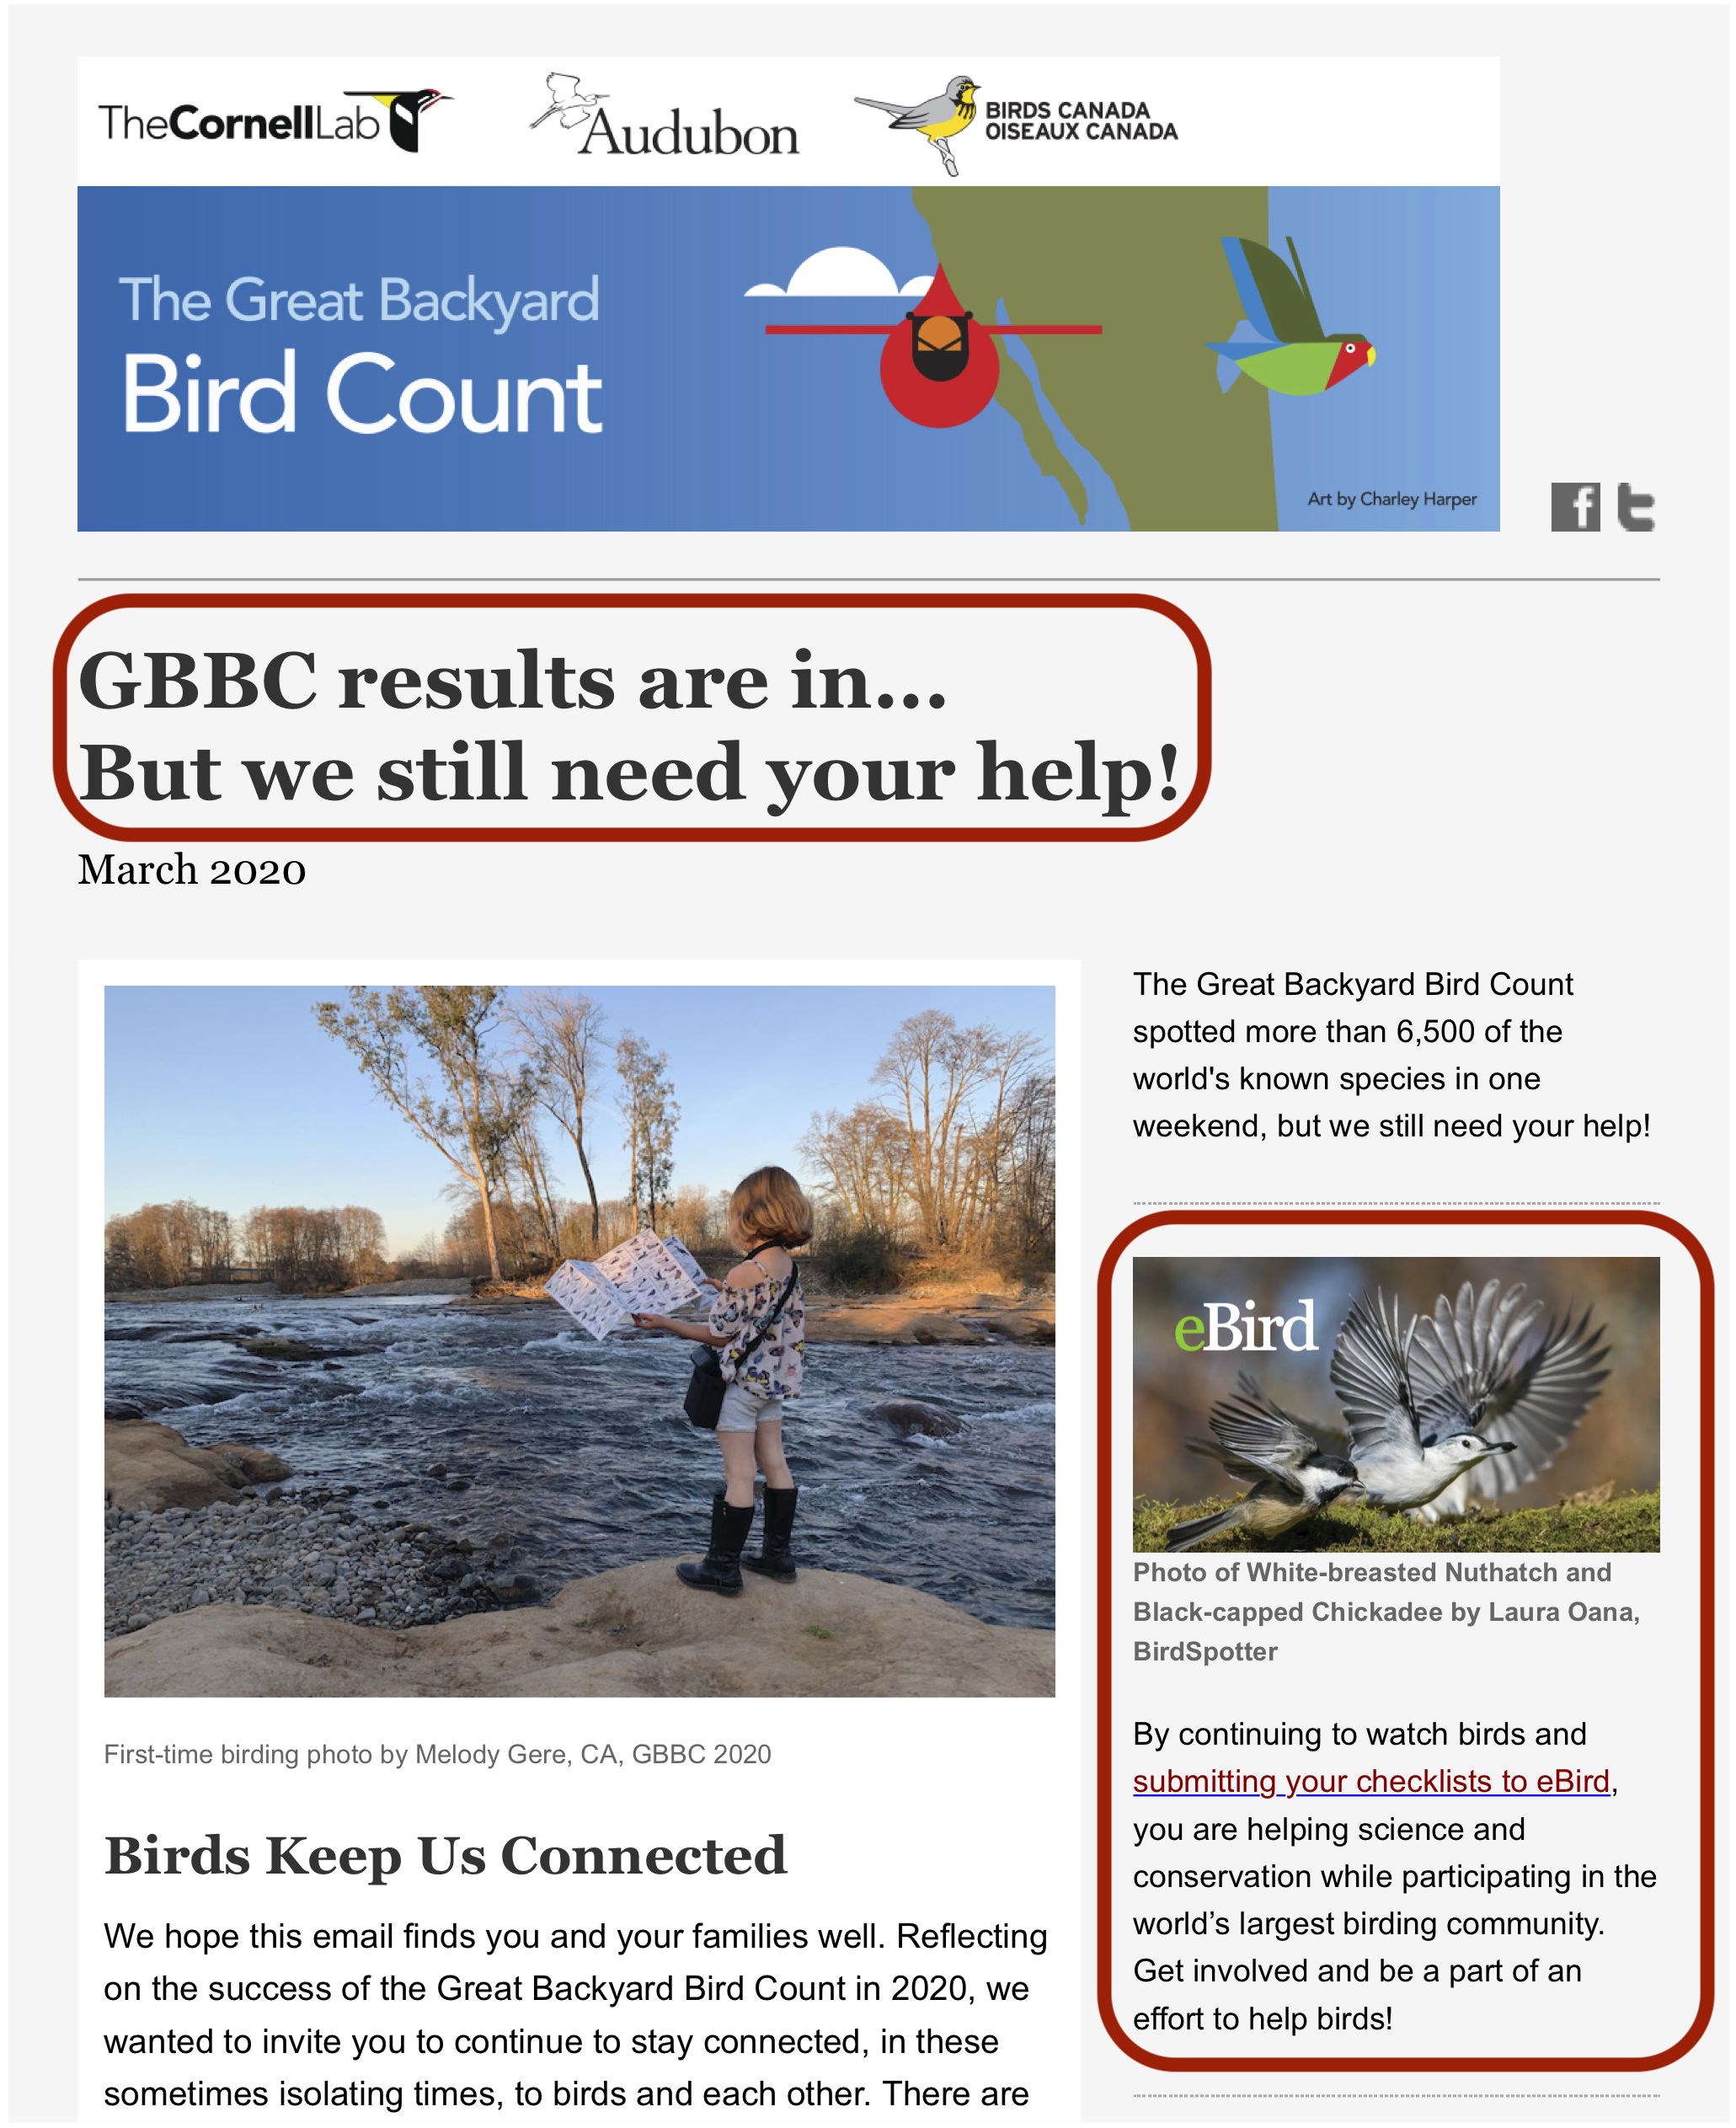

#### Bring birds back condition

In this condition, we used the email subject "It's Us to Bring Birds Back" (the title had the added prefix "Backyard Bird Watchers"

We also included a call to action to contribute further to Project FeederWatch.

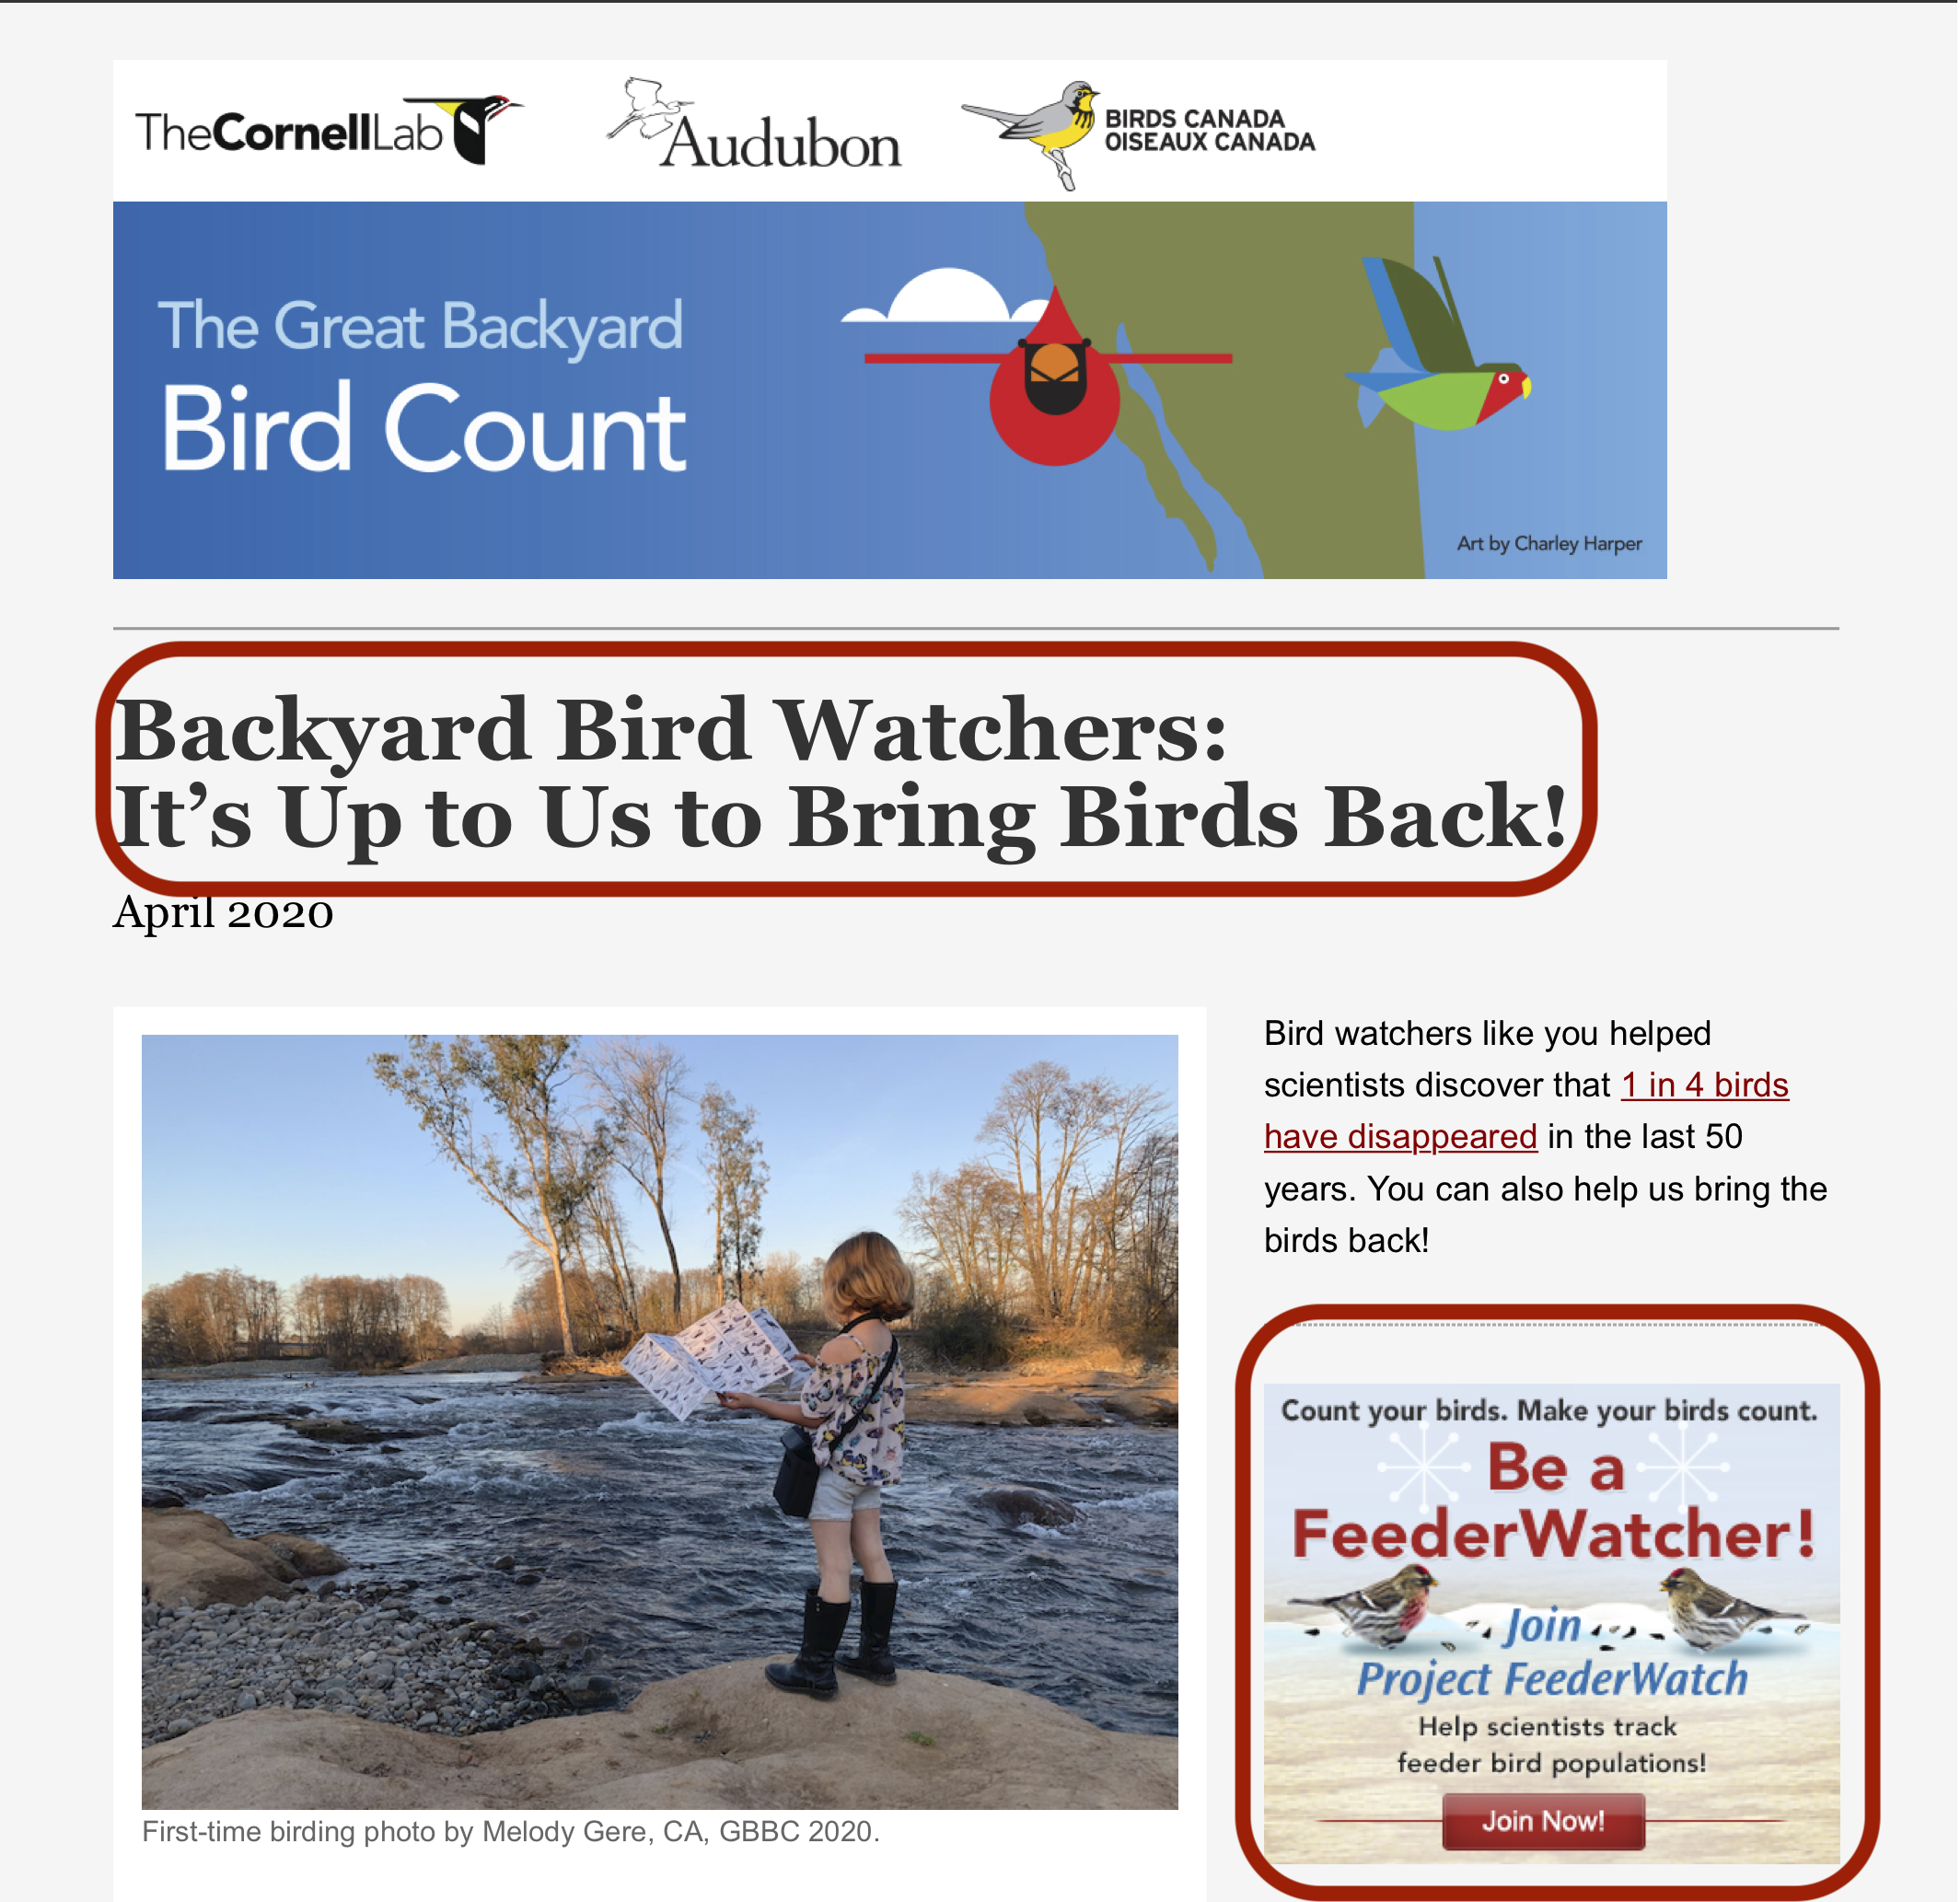

## Findings
Overall, among 9608 participants, we found that:

People who contributed checklists during the Great Backyard Bird Count are much more likely to open emails and contribute in the future than those who didn't, on average (p<0.001).

---

Looking at email opens, **the "we still need your help" email subject increases opens by 4.8 percentage points on average (p<0.001) compared to "GBBC eNews."** If scaled up, this could increase the number of email opens for this email by 461 people on average.  

We failed to find a difference between the standard email and the "It's up to us to bring birds back" email subject. This finding is consistent when adjusting for how many previous lists they submitted to eBird during GBBC.

---

Looking at the number of lists submitted, **the "we still need your help" email subject also increased the rate of eBird contributions by 2.6 percent compared to the control group (p<0.001).** If scaled up, this could increase the sum of submitted lists across all first-time GBBC participants by a total of 34, on average.

We failed to find an effect from the "Bring Birds Back" email, either because fewer people opened the email, or because the barriers to joining FeederWatch were too high to detect a significant effect. This finding is also consistent when adjusting for how many previous lists they submitted to eBird during GBBC.

---

These findings have been adjusted for 8 comparisons using the Holm method.

In [181]:
library(feather)
library(ggplot2)
library(repr)
library(gmodels)
library(MASS)
library(stringr)

catpalette   <- c("#333333", "#ea5324", "#005073", "#7D868C", "#BDBBBB", "#F2F2F2","#F6F2EB")
chartpalette <- c("#ea5324", "#005073", "#7D868C", "#333333", "#F2F2F2","#BDBBBB", "#F6F2EB")

cat.theme <-  theme_bw() +
              theme(plot.title = element_text(size=13, face="bold", color=catpalette[3]),
                    axis.title.x =element_text(size=10, hjust = -0.01, color = catpalette[1]),
                    axis.title.y =element_text(size=10, color = catpalette[1]),
                    panel.background = element_rect(fill=catpalette[6]))

### Load Data

In [2]:
folder <- "/Users/nathan/Tresors/CivilServant/projects/GBBC/post_experiment_analysis/"
participant <- read.csv(paste(folder, "gbbc_experiment-results.csv", sep=""))
# participant$bounced <- participant$bounced == "True"
participant$unsubscribed <- participant$unsubscribed == "True"
participant$opened.email <- participant$opens > 0
participant$arm <- factor(participant$group)
participant$num.ebird <- 
participant[is.na(participant$num.ebird.checklists.march.2020),]$num.ebird.checklists.march.2020 <- 0

In [189]:
colnames(participant)
nrow(participant)

[1] "user_id"                         "group"                          
 [3] "unsubscribed"                    "opens"                          
 [5] "num.ebird.species.march.2020"    "num.ebird.checklists.march.2020"
 [7] "ebird.contribs"                  "opened.email"                   
 [9] "arm"                             "num.ebird"                      
[11] "submitted.checklist"

[1] 9608

In [190]:
summary(email.open.m <- lm(opened.email ~ num.ebird.checklists.march.2020, data=participant))


Call:
lm(formula = opened.email ~ num.ebird.checklists.march.2020, 
    data = participant)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6374  -0.3305  -0.3305   0.5480   0.6695 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     0.330462   0.004799   68.86   <2e-16 ***
num.ebird.checklists.march.2020 0.121580   0.002335   52.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4364 on 9606 degrees of freedom
Multiple R-squared:  0.2201,	Adjusted R-squared:   0.22 
F-statistic:  2711 on 1 and 9606 DF,  p-value: < 2.2e-16


# Testing open rates compared to control

In [8]:
summary(email.open.m <- lm(opened.email ~ arm, data=participant))


Call:
lm(formula = opened.email ~ arm, data = participant)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4588 -0.4112 -0.4012  0.5888  0.5988 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.411177   0.008721  47.146  < 2e-16 ***
armebird        0.047599   0.012335   3.859 0.000115 ***
armfeederwatch -0.009991   0.012334  -0.810 0.417948    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4936 on 9605 degrees of freedom
Multiple R-squared:  0.002585,	Adjusted R-squared:  0.002378 
F-statistic: 12.45 on 2 and 9605 DF,  p-value: 3.99e-06


### Plot Results: Testing Open Rates

In [9]:
coef.email.open.m <- coef(summary(email.open.m))
needhelp.effect <- formatC(coef.email.open.m['armebird',][['Estimate']]*100, digits=2)
needhelp.pvalue <- coef.email.open.m['armebird',][['Pr(>|t|)']]

arm         fit       lwr       upr      
1 control     0.4111770 0.3940814 0.4282726
2 ebird       0.4587758 0.4416775 0.4758741
3 feederwatch 0.4011864 0.3840908 0.4182820

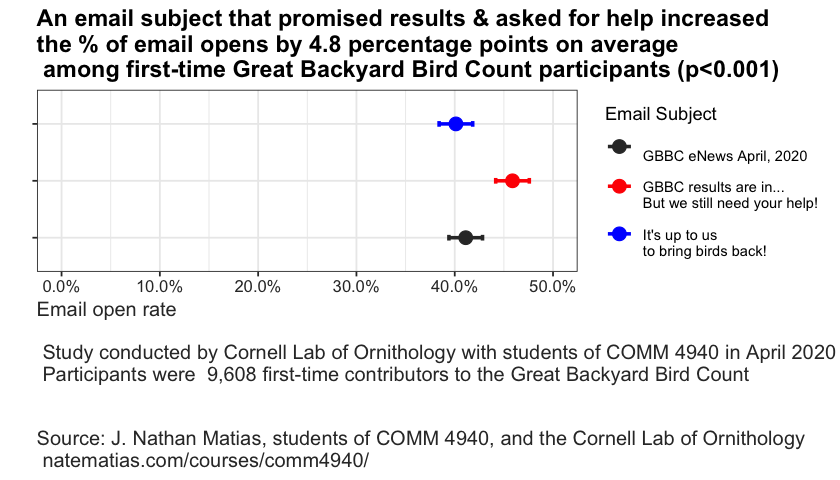

In [10]:
options(repr.plot.width=7, repr.plot.height=4)

plot.df <- data.frame(arm=c("control","ebird", "feederwatch"))

plot.df <- cbind(plot.df, predict(email.open.m, plot.df, interval="confidence"))
plot.df

ggplot(plot.df, aes(arm, fit, color=arm)) +
    geom_point(size=3.5) +
    geom_errorbar(aes(ymin=lwr, ymax=upr), width=0.1, size=1) +
    scale_y_continuous(labels=scales::percent, limits=c(0,0.5)) +
    coord_flip() +
    theme_bw() +
    scale_color_manual(name="Email Subject",
                       values=c("#333333", "red", "blue"), 
                       labels = c("GBBC eNews April, 2020", "GBBC results are in...\nBut we still need your help!", "It's up to us\nto bring birds back!")) +
    theme(axis.text.x = element_text(size = 10,color = "#333333"),
          axis.text.y = element_blank(),
          axis.title = element_text(size=12, color="#333333", hjust=0),
          legend.text = element_text(margin = margin(t = 10)),
          plot.title = element_text(size=14,face="bold")) +
    xlab("") +
    ylab(paste("Email open rate\n\n", 
               "Study conducted by Cornell Lab of Ornithology with students of COMM 4940 in April 2020\n",
               "Participants were ", prettyNum(nrow(participant),big.mark=","),"first-time contributors to the Great Backyard Bird Count\n",
               "\n\nSource: J. Nathan Matias, students of COMM 4940, and the Cornell Lab of Ornithology\n",
               "natematias.com/courses/comm4940/"
              )) +
    ggtitle(paste("An email subject that promised results & asked for help increased\n",
                  "the % of email opens by ", needhelp.effect, " percentage points on average\n", 
                  " among first-time Great Backyard Bird Count participants (p<0.001)", sep=""))

### Confirm that this effect is consistent even when adjusting for the number of previous contributions they had made

In [183]:
## CONFIRM 
summary(email.open.adj.m <- lm(opened.email ~ arm + num.ebird.checklists.march.2020, data=participant))


Call:
lm(formula = opened.email ~ arm + num.ebird.checklists.march.2020, 
    data = participant)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6141  -0.3201  -0.3099   0.5169   0.6901 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      0.320106   0.007898  40.528  < 2e-16 ***
armebird                         0.041578   0.010894   3.817 0.000136 ***
armfeederwatch                  -0.010180   0.010893  -0.935 0.350024    
num.ebird.checklists.march.2020  0.121441   0.002333  52.063  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4359 on 9604 degrees of freedom
Multiple R-squared:  0.2221,	Adjusted R-squared:  0.2219 
F-statistic: 914.2 on 3 and 9604 DF,  p-value: < 2.2e-16


# Analysis of Effect on Whether An Account Made Any Subsequent Contributions to eBird

In [160]:
summary(ebird.contrib.ebird.m <-  lm(ebird.contribs>0 ~ arm, data=subset(participant, arm!="ebird")))


Call:
lm(formula = ebird.contribs > 0 ~ arm, data = subset(participant, 
    arm != "ebird"))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02810 -0.02810 -0.02466 -0.02466  0.97534 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.024664   0.002832   8.709   <2e-16 ***
armfeederwatch 0.003434   0.004005   0.857    0.391    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1603 on 6404 degrees of freedom
Multiple R-squared:  0.0001148,	Adjusted R-squared:  -4.134e-05 
F-statistic: 0.7352 on 1 and 6404 DF,  p-value: 0.3912


In [42]:
summary(ebird.contrib.feederwatch.m <- lm(ebird.contribs>0 ~ arm, data=subset(participant, arm!="feederwatch")))


Call:
lm(formula = ebird.contribs > 0 ~ arm, data = subset(participant, 
    arm != "feederwatch"))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02873 -0.02873 -0.02466 -0.02466  0.97534 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.024664   0.002849   8.659   <2e-16 ***
armebird    0.004068   0.004029   1.010    0.313    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1612 on 6403 degrees of freedom
Multiple R-squared:  0.0001592,	Adjusted R-squared:  3.034e-06 
F-statistic: 1.019 on 1 and 6403 DF,  p-value: 0.3127


# Followup Analysis Based on Prior eBird contributions
In this exploratory analysis of open rates and the number of contributions, we adjust for the following variable:

**num.ebird.checklists.march.2020**: number of checklists (with any number of birds) submitted by the participant during the great backyard bird count in March

In this analysis, we're going to make the assumption (currently unconfirmed) that if `num.ebird.checklists.march.2020` is NA, they didn't submit any checklists (alternatively, it might mean that their account wasn't found by the eBird team).

In [19]:
participant$submitted.checklist <- participant$num.ebird.checklists.march.2020>0

Just from the CrossTable below, we see that every single account that submitted a checklist opened the email. That's pretty amazing! Among people who didn't submit a checklist, 9% opened the email.

In [20]:
CrossTable(participant$submitted.checklist, participant$opened.email, 
           prop.t = FALSE,chisq.test=FALSE, prop.c=FALSE, prop.r=TRUE)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  9608 

 
                                | participant$opened.email 
participant$submitted.checklist |     FALSE |      TRUE | Row Total | 
--------------------------------|-----------|-----------|-----------|
                          FALSE |      5537 |       553 |      6090 | 
                                |  1171.159 |  1592.903 |           | 
                                |     0.909 |     0.091 |     0.634 | 
--------------------------------|-----------|-----------|-----------|
                           TRUE |         0 |      3518 |      3518 | 
                                |  2027.390 |  2757.470 |           | 
                                |     0.000 |     1.000 |     0.366 | 
--------------------------------|-----------|-----------|-----------|
                   Column Total

### Adjusted Email Open Results (Exploratory)

In [45]:
summary(email.open.adj.m <- lm(opened.email ~ arm + num.ebird.checklists.march.2020,  data=participant))


Call:
lm(formula = opened.email ~ arm + num.ebird.checklists.march.2020, 
    data = participant)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6141  -0.3201  -0.3099   0.5169   0.6901 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      0.320106   0.007898  40.528  < 2e-16 ***
armebird                         0.041578   0.010894   3.817 0.000136 ***
armfeederwatch                  -0.010180   0.010893  -0.935 0.350024    
num.ebird.checklists.march.2020  0.121441   0.002333  52.063  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4359 on 9604 degrees of freedom
Multiple R-squared:  0.2221,	Adjusted R-squared:  0.2219 
F-statistic: 914.2 on 3 and 9604 DF,  p-value: < 2.2e-16


### eBird Contribution Count Results (Exploratory)

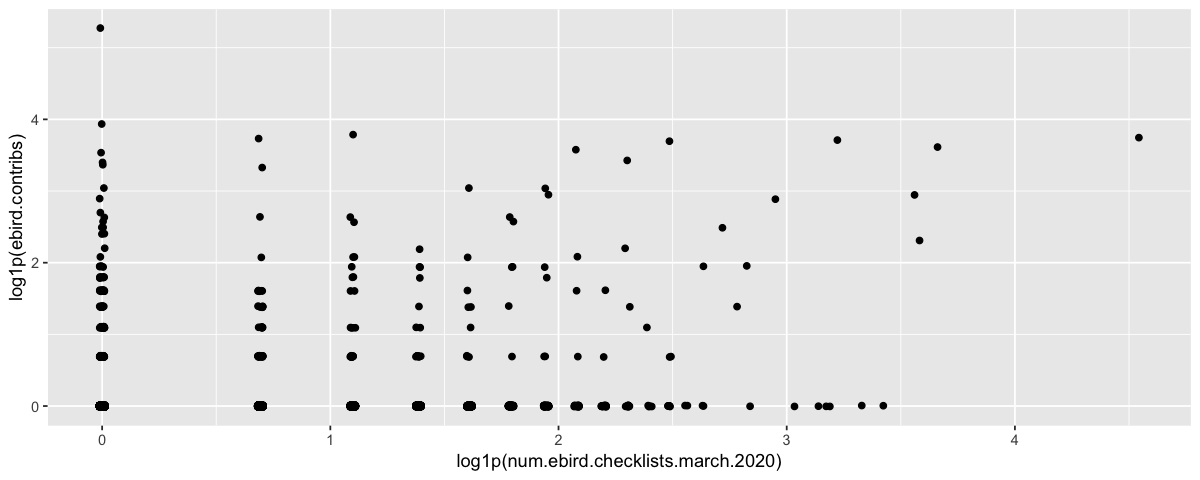

In [55]:
ggplot(participant, aes(log1p(num.ebird.checklists.march.2020), log1p(ebird.contribs))) +
    geom_jitter()

In [60]:
summary(ebird.contrib.adj.m <- glm.nb(ebird.contribs ~ arm + num.ebird.checklists.march.2020,  data=participant))


Call:
glm.nb(formula = ebird.contribs ~ arm + num.ebird.checklists.march.2020, 
    data = participant, init.theta = 0.01146706101, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5911  -0.2534  -0.2212  -0.2125   4.9038  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -2.70402    0.18148 -14.900  < 2e-16 ***
armebird                         0.97246    0.24505   3.968 7.23e-05 ***
armfeederwatch                   0.05403    0.24974   0.216    0.829    
num.ebird.checklists.march.2020  0.24359    0.05065   4.810 1.51e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.0115) family taken to be 1)

    Null deviance: 766.77  on 9607  degrees of freedom
Residual deviance: 699.30  on 9604  degrees of freedom
AIC: 3578.6

Number of Fisher Scoring iterations: 1


              Theta:  0.011467 
          Std. Err.:  

In [198]:
# scale-up calculation: 
(sum(subset(participant, arm=="control")$ebird.contribs)*0.026) * 3

[1] 33.852

In [147]:
contribs.model <- data.frame(cbind(coef(summary(ebird.contrib.adj.m)), confint(ebird.contrib.adj.m)))
contribs.model <- contribs.model[str_detect(row.names(contribs.model), "arm"),]
names(contribs.model)[4] <- "pvalue"
names(contribs.model)[5] <- "CI.Lower"
names(contribs.model)[6] <- "CI.Upper"
contribs.model$arm <- c("ebird", "feederwatch")
contribs.model

contribs.effect <- exp(subset(contribs.model, arm=="ebird")$Estimate)

Waiting for profiling to be done...


Estimate   Std..Error z.value   pvalue       CI.Lower  
armebird       0.97245810 0.2450479  3.9684411 7.234432e-05  0.4893794
armfeederwatch 0.05402885 0.2497433  0.2163375 8.287247e-01 -0.4371676
               CI.Upper  arm        
armebird       1.4559936 ebird      
armfeederwatch 0.5449844 feederwatch

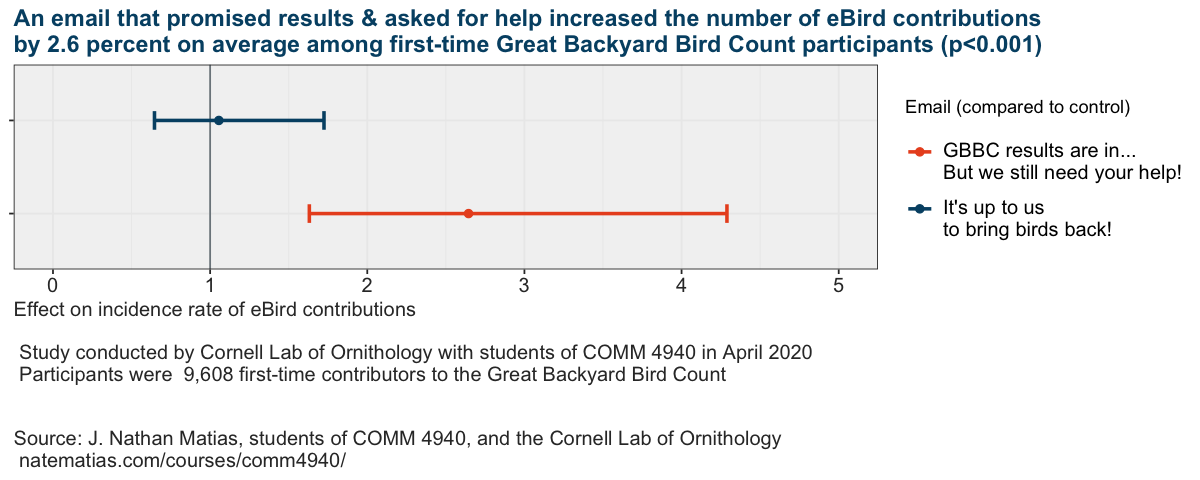

In [200]:
ggplot(contribs.model, aes(arm, exp(Estimate), color=arm)) +
    ylim(0,5)+
    geom_hline(yintercept=1, color=catpalette[4]) +
    geom_point(size=2) +
    geom_errorbar(aes(ymax=exp(contribs.model$CI.Upper)), 
                      ymin=exp(contribs.model$CI.Lower), size=1, width=0.2) +
    scale_color_manual(values=c(catpalette[2],catpalette[3]),
                       labels = c("GBBC results are in...\nBut we still need your help!", 
                                  "It's up to us\nto bring birds back!")) +
    coord_flip() +
    labs(color="Email (compared to control)") +
    cat.theme +
    theme(axis.text = element_text(size = 12,color = "#333333"),
          axis.text.y = element_blank(),
          axis.title.y = element_blank(),
          axis.title.x = element_text(size=12, color="#333333", hjust=0),
          legend.text = element_text(size=12,margin = margin(t = 10)),
          plot.title = element_text(size=14,face="bold")) +
    ggtitle(paste("An email that promised results & asked for help increased",
                  " the number of eBird contributions\nby ", prettyNum(contribs.effect, digits=2), " percent ", 
                  "on average among first-time Great Backyard Bird Count participants (p<0.001)", sep="")) +
    ylab(paste("Effect on incidence rate of eBird contributions\n\n", 
               "Study conducted by Cornell Lab of Ornithology with students of COMM 4940 in April 2020\n",
               "Participants were ", prettyNum(nrow(participant),big.mark=","),"first-time contributors to the Great Backyard Bird Count\n",
               "\n\nSource: J. Nathan Matias, students of COMM 4940, and the Cornell Lab of Ornithology\n",
               "natematias.com/courses/comm4940/"
              ))

     

# Adjust p values

In [188]:
p.adjust(c(coef.email.open.m[,'Pr(>|t|)'][2], #overall ebird open (this one matters)
           coef.email.open.m[,'Pr(>|t|)'][3], #overall feederwatch open
           coef(summary(email.open.adj.m))[,'Pr(>|t|)'][2], #adjusted ebird open (this one matters)
            coef(summary(email.open.adj.m))[,'Pr(>|t|)'][3], #adjusted feederwatch open
           coef(summary(ebird.contrib.ebird.m))[,'Pr(>|t|)'][2], #any ebird
           coef(summary(ebird.contrib.feederwatch.m))[,'Pr(>|t|)'][2], #any feederwatch
           contribs.model['armebird','pvalue'], #count ebird pvalue, (this one matters)
           contribs.model['armfeederwatch','pvalue']  #count feederwatch pvalue 
           ), method="holm")

armebird armfeederwatch       armebird armfeederwatch armfeederwatch 
  0.0008024784   1.0000000000   0.0008171768   1.0000000000   1.0000000000 
      armebird                               
  1.0000000000   0.0005787546   1.0000000000

# License

**Copyright 2020, J. Nathan Matias.**

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
